In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from collections import Counter

from src.graph import (
    graph_loader,
    spectral_bipartition_coloring
)

from src.seed import (seed_degree, 
    seed_polarized, 
    seed_random, 
    seed_polarized_centrality_mixed, 
    seed_polarized_centrality, 
    seed_polarized_degree, 
    seed_centrality_mixed, 
    seed_centrality, 
    seed_influence_maximization
)

from evaluation_fixed_seed import evaluate_all_seeds

In [2]:
import warnings

# Suppress the specific UserWarning from sklearn
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.manifold._spectral_embedding")

In [3]:
num_groups = 2


G = graph_loader('datasets/congress_network/congress.edgelist')

spectral_bipartition_coloring(G)

colors = plt.colormaps['tab10'].resampled(num_groups)   # Use 'tab10' colormap to get distinct colors
color_map = [colors(G.nodes[node]["color"]) for node in G.nodes()]
print(', '.join([f"Color {i+1}: {value}" for i, value in enumerate(list(Counter(color_map).values()))]))

Number of Nodes: 475
Number of Edges: 13289
Color 1: 284, Color 2: 191


In [4]:
seed_size = G.number_of_nodes() // 20
print(f"Seed size: {seed_size}")
max_iter = 1500

directory = 'results/test_twitter/'  # Adjust the path if needed

Seed size: 23


In [5]:
k_values = np.linspace(1, seed_size, 5, dtype=int)  #[1,5,10,15,20,25,30]

        
seed_functions = {
        "Random": seed_random(G, seed_size),
        "Degree": seed_degree(G, seed_size),
        "Centrality": seed_centrality(G, seed_size),
        "Centrality Mixed": seed_centrality_mixed(G, seed_size),
        "Polarized": seed_polarized(G, seed_size, 0),
        "Polarized Degree": seed_polarized_degree(G, seed_size, 0),
        "Polarized Centrality": seed_polarized_centrality(G, seed_size, 0),
        "Polarized Centrality Mixed": seed_polarized_centrality_mixed(G, seed_size, 0),
    }

for k in k_values:
    print(f"K: {k}")
    budget = 2 * k

    # Example of how to call the function
    all_results_df = evaluate_all_seeds(G, seed_functions, k, max_iter, budget, "netin_09_test", verbose=False)

    all_results_df.to_csv(f"{directory}results_congress_network_{k}_k_{budget}_budget.csv", index=False)

K: 1
Running evaluation for seed function: Random
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [01:02<00:00,  7.27it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 1/1 [00:02<00:00,  2.28s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 701.21it/s]


Running evaluation for seed function: Degree
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [00:47<00:00,  9.48it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 1/1 [00:02<00:00,  2.17s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2941.50it/s]


Running evaluation for seed function: Centrality
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [00:43<00:00, 10.30it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 1/1 [00:02<00:00,  2.07s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2178.47it/s]


Running evaluation for seed function: Centrality Mixed
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [00:47<00:00,  9.42it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 1/1 [00:02<00:00,  2.13s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2950.22it/s]


Running evaluation for seed function: Polarized
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [01:02<00:00,  7.23it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 1/1 [00:02<00:00,  2.30s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2911.25it/s]


Running evaluation for seed function: Polarized Degree
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [00:52<00:00,  8.56it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 1/1 [00:02<00:00,  2.26s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2622.08it/s]


Running evaluation for seed function: Polarized Centrality
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [00:46<00:00,  9.62it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 3149.00it/s]


Running evaluation for seed function: Polarized Centrality Mixed
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [00:51<00:00,  8.71it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2893.27it/s]


K: 6
Running evaluation for seed function: Random
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [01:01<00:00,  7.41it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 6/6 [00:32<00:00,  5.43s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 3102.99it/s]


Running evaluation for seed function: Degree
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [00:47<00:00,  9.52it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 6/6 [00:31<00:00,  5.29s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2308.80it/s]


Running evaluation for seed function: Centrality
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [00:43<00:00, 10.42it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 6/6 [00:31<00:00,  5.24s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2863.19it/s]


Running evaluation for seed function: Centrality Mixed
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [00:48<00:00,  9.34it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 6/6 [00:31<00:00,  5.31s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2912.74it/s]


Running evaluation for seed function: Polarized
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [01:02<00:00,  7.21it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 6/6 [00:33<00:00,  5.52s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2913.08it/s]


Running evaluation for seed function: Polarized Degree
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [00:52<00:00,  8.60it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 6/6 [00:31<00:00,  5.31s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2925.85it/s]


Running evaluation for seed function: Polarized Centrality
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [00:47<00:00,  9.58it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 6/6 [00:31<00:00,  5.22s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2890.86it/s]


Running evaluation for seed function: Polarized Centrality Mixed
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [00:52<00:00,  8.55it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 6/6 [00:31<00:00,  5.30s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2933.01it/s]


K: 12
Running evaluation for seed function: Random
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [01:02<00:00,  7.23it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 12/12 [01:52<00:00,  9.36s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2916.83it/s]


Running evaluation for seed function: Degree
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [00:48<00:00,  9.30it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 12/12 [01:50<00:00,  9.22s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2965.91it/s]


Running evaluation for seed function: Centrality
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [00:43<00:00, 10.32it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 12/12 [01:44<00:00,  8.68s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 3092.55it/s]


Running evaluation for seed function: Centrality Mixed
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [00:45<00:00,  9.91it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 12/12 [01:45<00:00,  8.79s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 3030.32it/s]


Running evaluation for seed function: Polarized
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [01:01<00:00,  7.38it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 12/12 [01:52<00:00,  9.37s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2937.19it/s]


Running evaluation for seed function: Polarized Degree
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [00:52<00:00,  8.67it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 12/12 [01:50<00:00,  9.18s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2949.94it/s]


Running evaluation for seed function: Polarized Centrality
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [00:46<00:00,  9.72it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 12/12 [01:50<00:00,  9.22s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2110.58it/s]


Running evaluation for seed function: Polarized Centrality Mixed
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [00:52<00:00,  8.57it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 12/12 [01:49<00:00,  9.16s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2293.13it/s]


K: 17
Running evaluation for seed function: Random
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [01:02<00:00,  7.27it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 17/17 [03:38<00:00, 12.83s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 721.29it/s]


Running evaluation for seed function: Degree
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [00:47<00:00,  9.45it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 17/17 [03:31<00:00, 12.42s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 700.27it/s]


Running evaluation for seed function: Centrality
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [00:43<00:00, 10.32it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 17/17 [03:34<00:00, 12.59s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 655.32it/s]


Running evaluation for seed function: Centrality Mixed
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [00:48<00:00,  9.37it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 17/17 [03:31<00:00, 12.44s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 712.38it/s]


Running evaluation for seed function: Polarized
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [01:00<00:00,  7.48it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 17/17 [03:33<00:00, 12.55s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 736.84it/s]


Running evaluation for seed function: Polarized Degree
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [00:49<00:00,  9.04it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 17/17 [03:30<00:00, 12.38s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 708.42it/s]


Running evaluation for seed function: Polarized Centrality
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [00:45<00:00,  9.98it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 17/17 [03:38<00:00, 12.86s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 721.55it/s]


Running evaluation for seed function: Polarized Centrality Mixed
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [00:52<00:00,  8.59it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 17/17 [03:31<00:00, 12.44s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 665.02it/s]


K: 23
Running evaluation for seed function: Random
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [01:01<00:00,  7.37it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 23/23 [06:13<00:00, 16.22s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 716.18it/s]


Running evaluation for seed function: Degree
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [00:46<00:00,  9.79it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 23/23 [06:12<00:00, 16.19s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 689.76it/s]


Running evaluation for seed function: Centrality
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [00:42<00:00, 10.67it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 23/23 [06:16<00:00, 16.36s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 712.98it/s]


Running evaluation for seed function: Centrality Mixed
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [00:47<00:00,  9.49it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 23/23 [06:11<00:00, 16.14s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 668.96it/s]


Running evaluation for seed function: Polarized
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [01:02<00:00,  7.27it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 23/23 [06:19<00:00, 16.51s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 728.76it/s]


Running evaluation for seed function: Polarized Degree
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [00:52<00:00,  8.61it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 23/23 [06:23<00:00, 16.66s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 627.29it/s]


Running evaluation for seed function: Polarized Centrality
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [00:46<00:00,  9.69it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 23/23 [06:29<00:00, 16.95s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 629.21it/s]


Running evaluation for seed function: Polarized Centrality Mixed
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Custom


Evaluating nodes: 100%|██████████| 452/452 [00:54<00:00,  8.27it/s]


    Running evaluation for graph modification: Custom V2


Selecting nodes: 100%|██████████| 23/23 [06:49<00:00, 17.79s/it]


    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 586.04it/s]


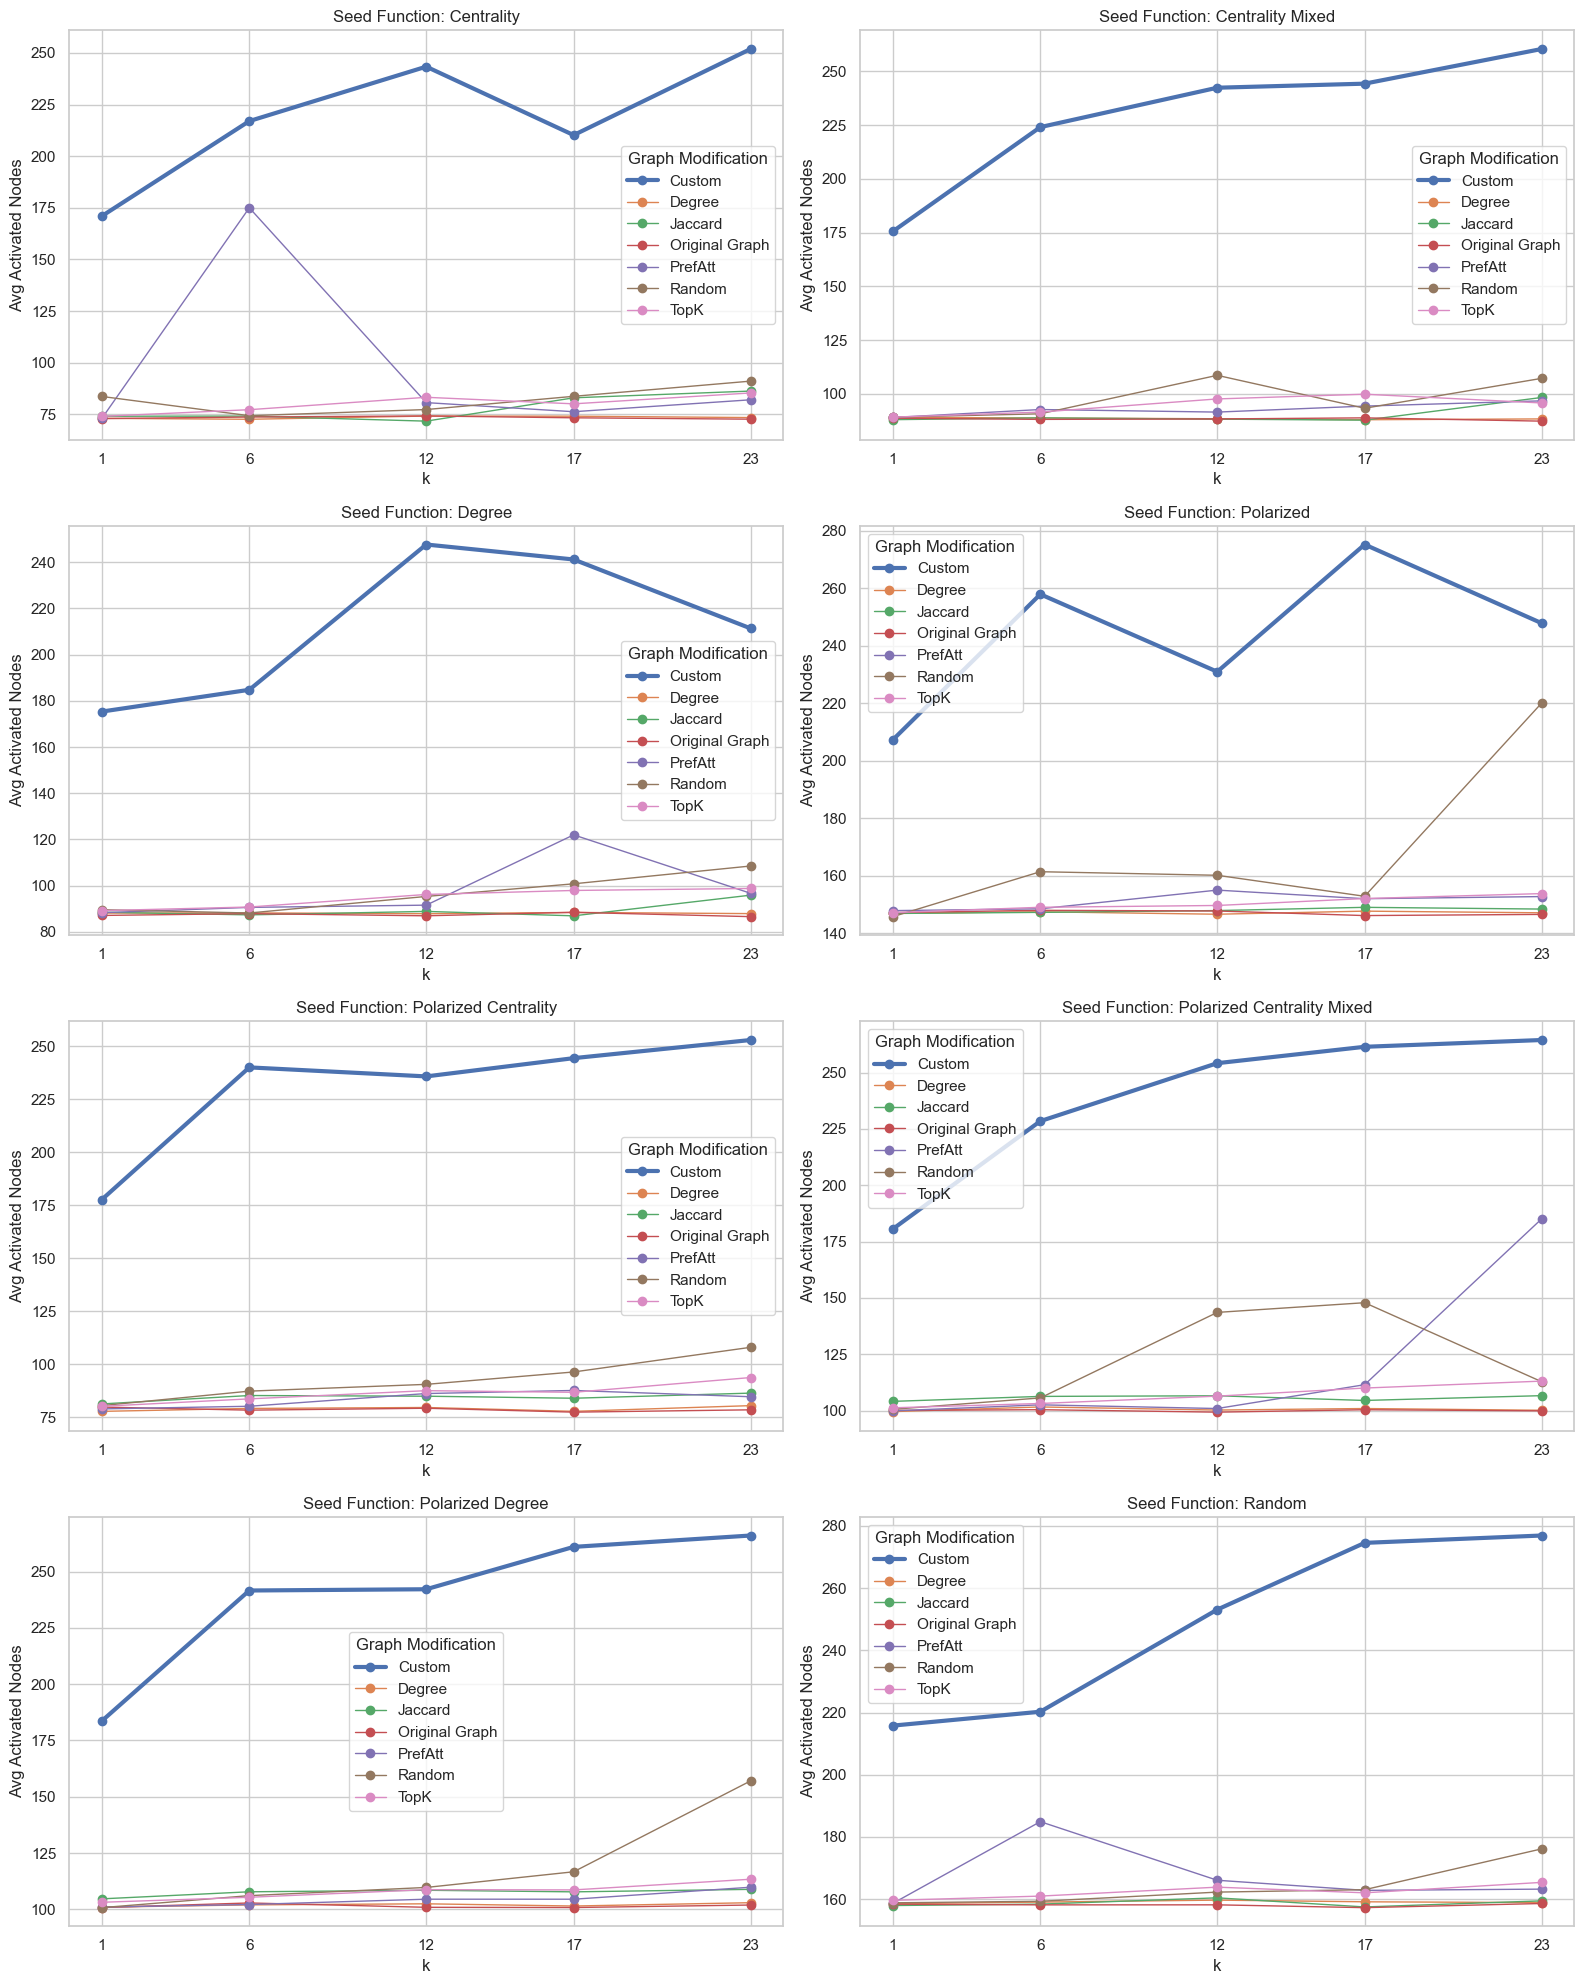

In [14]:
# Dictionary to store k values and corresponding dataframes
k_dict = {}

# Iterate over all the files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):  # assuming the files are in CSV format
        # Extract the k value from the filename (assuming k is before "_budget")
        try:
            k_value = filename.split("_k_")[0].split("_")[-1]
            k_value = int(k_value)
        except (IndexError, ValueError):
            print(f"Filename {filename} does not match the expected pattern.")
            continue
        
        # Read the CSV file into a DataFrame
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        
        df = df[df["Graph Modification"] != "KKT"]
        
        # Store the DataFrame in the dictionary with k as the key
        k_dict[k_value] = df[["Seed Function", "Graph Modification", "Avg Activated Nodes"]]

# Assuming 'k_dict' is the dictionary with k values as keys and dataframes as values
dfs = []

# Iterate over the dictionary and add 'k' as a new column in each dataframe
for k, df in k_dict.items():
    df['k'] = k  # Add 'k' column to each dataframe
    dfs.append(df)  # Append the dataframe to the list

# Concatenate all the dataframes into one combined dataframe
if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)
else:
    raise ValueError("No dataframes available to concatenate.")

# Now combined_df contains all the data from the different k values

# Ensure that seaborn style is applied for better visuals (optional)
sns.set(style="whitegrid")

# Get the unique seed functions
seed_functions = combined_df['Seed Function'].unique()

# Set up the number of rows and columns for the grid (e.g., 2 columns, adjust based on number of seed functions)
num_seed_functions = len(seed_functions)
cols = 2
rows = math.ceil(num_seed_functions / cols)

# Create subplots with a grid layout
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 5))  # Adjust the size as needed

# Flatten axes array for easier indexing (in case of a 2D array)
axes = axes.flatten()

# Iterate over each seed function and create a plot in the grid
for i, seed_function in enumerate(seed_functions):
    # Filter the dataframe for the current seed function
    seed_df = combined_df[combined_df['Seed Function'] == seed_function]
    
    # Create a pivot table to have 'k' on the x-axis and 'Avg Activated Nodes' on the y-axis
    pivot_table = seed_df.pivot_table(index='k', columns='Graph Modification', values='Avg Activated Nodes')
    
    # Reindex the pivot table to ensure all k values from k_values are used (fill missing values with NaN)
    pivot_table = pivot_table.reindex(k_values)

    # Plot each line separately so we can adjust the linewidth for Custom and Custom V2
    ax = axes[i]
    for graph_modification in pivot_table.columns:
        if graph_modification in ["Custom", "Custom V2", "Custom V3"]:
            pivot_table[graph_modification].plot(ax=ax, marker='o', linewidth=3, label=graph_modification)  # Thicker line
        else:
            pivot_table[graph_modification].plot(ax=ax, marker='o', linewidth=1, label=graph_modification)  # Default line width

    # Add title, labels, and legend
    ax.set_title(f"Seed Function: {seed_function}")
    ax.set_xlabel("k")
    ax.set_ylabel("Avg Activated Nodes")
    ax.set_xticks(k_values)
    ax.legend(title="Graph Modification")
    
# Hide any unused axes (if there are any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Removes the axis completely, leaving white space

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the grid of plots
plt.show()

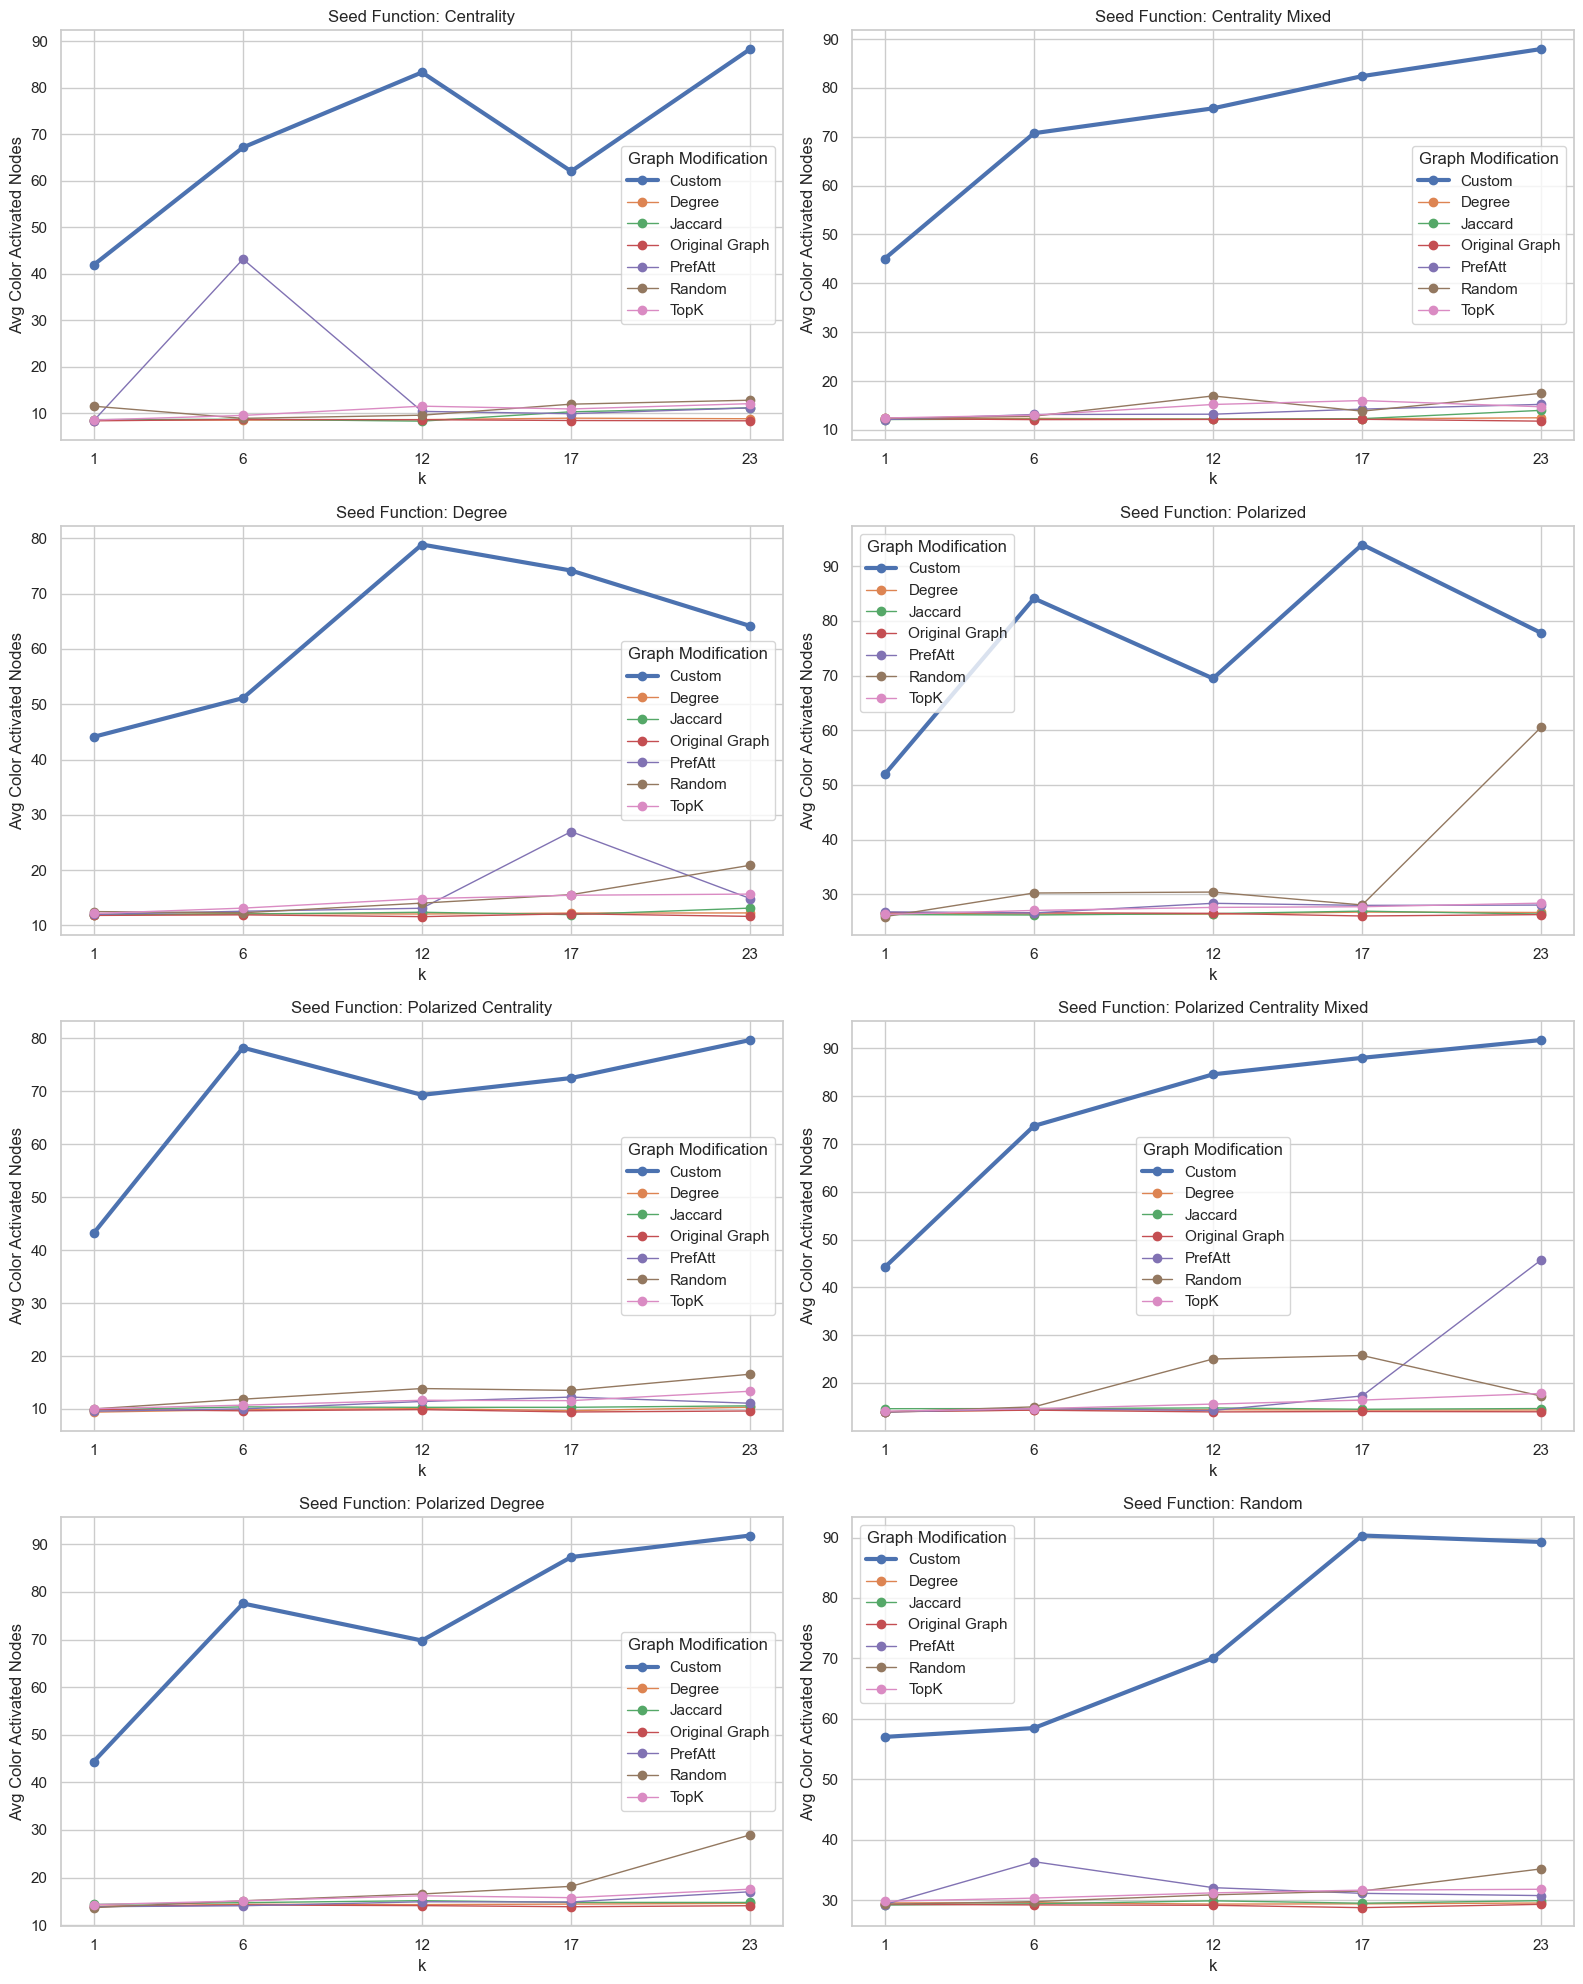

In [15]:
# Dictionary to store k values and corresponding dataframes
k_dict = {}

# Iterate over all the files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):  # assuming the files are in CSV format
        # Extract the k value from the filename (assuming k is before "_budget")
        try:
            k_value = filename.split("_k_")[0].split("_")[-1]
            k_value = int(k_value)
        except (IndexError, ValueError):
            print(f"Filename {filename} does not match the expected pattern.")
            continue
        
        # Read the CSV file into a DataFrame
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        
        # Store the DataFrame in the dictionary with k as the key
        k_dict[k_value] = df[["Seed Function", "Graph Modification", "Avg Color Activation Count"]]

# Assuming 'k_dict' is the dictionary with k values as keys and dataframes as values
dfs = []

# Iterate over the dictionary and add 'k' as a new column in each dataframe
for k, df in k_dict.items():
    df['k'] = k  # Add 'k' column to each dataframe
    dfs.append(df)  # Append the dataframe to the list

# Concatenate all the dataframes into one combined dataframe
if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)
else:
    raise ValueError("No dataframes available to concatenate.")

# Now combined_df contains all the data from the different k values

# Ensure that seaborn style is applied for better visuals (optional)
sns.set(style="whitegrid")

# Get the unique seed functions
seed_functions = combined_df['Seed Function'].unique()

# Set up the number of rows and columns for the grid (e.g., 2 columns, adjust based on number of seed functions)
num_seed_functions = len(seed_functions)
cols = 2
rows = math.ceil(num_seed_functions / cols)

# Create subplots with a grid layout
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 5))  # Adjust the size as needed

# Flatten axes array for easier indexing (in case of a 2D array)
axes = axes.flatten()

# Iterate over each seed function and create a plot in the grid
for i, seed_function in enumerate(seed_functions):
    # Filter the dataframe for the current seed function
    seed_df = combined_df[combined_df['Seed Function'] == seed_function]
    
    # Create a pivot table to have 'k' on the x-axis and 'Avg Activated Nodes' on the y-axis
    pivot_table = seed_df.pivot_table(index='k', columns='Graph Modification', values='Avg Color Activation Count')
    
    # Reindex the pivot table to ensure all k values from k_values are used (fill missing values with NaN)
    pivot_table = pivot_table.reindex(k_values)

    # Plot each line separately so we can adjust the linewidth for Custom and Custom V2
    ax = axes[i]
    for graph_modification in pivot_table.columns:
        if graph_modification in ["Custom", "Custom V2", "Custom V3"]:
            pivot_table[graph_modification].plot(ax=ax, marker='o', linewidth=3, label=graph_modification)  # Thicker line
        else:
            pivot_table[graph_modification].plot(ax=ax, marker='o', linewidth=1, label=graph_modification)  # Default line width

    # Add title, labels, and legend
    ax.set_title(f"Seed Function: {seed_function}")
    ax.set_xlabel("k")
    ax.set_ylabel("Avg Color Activated Nodes")
    ax.set_xticks(k_values)
    ax.legend(title="Graph Modification")
    
# Hide any unused axes (if there are any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Removes the axis completely, leaving white space

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the grid of plots
plt.show()

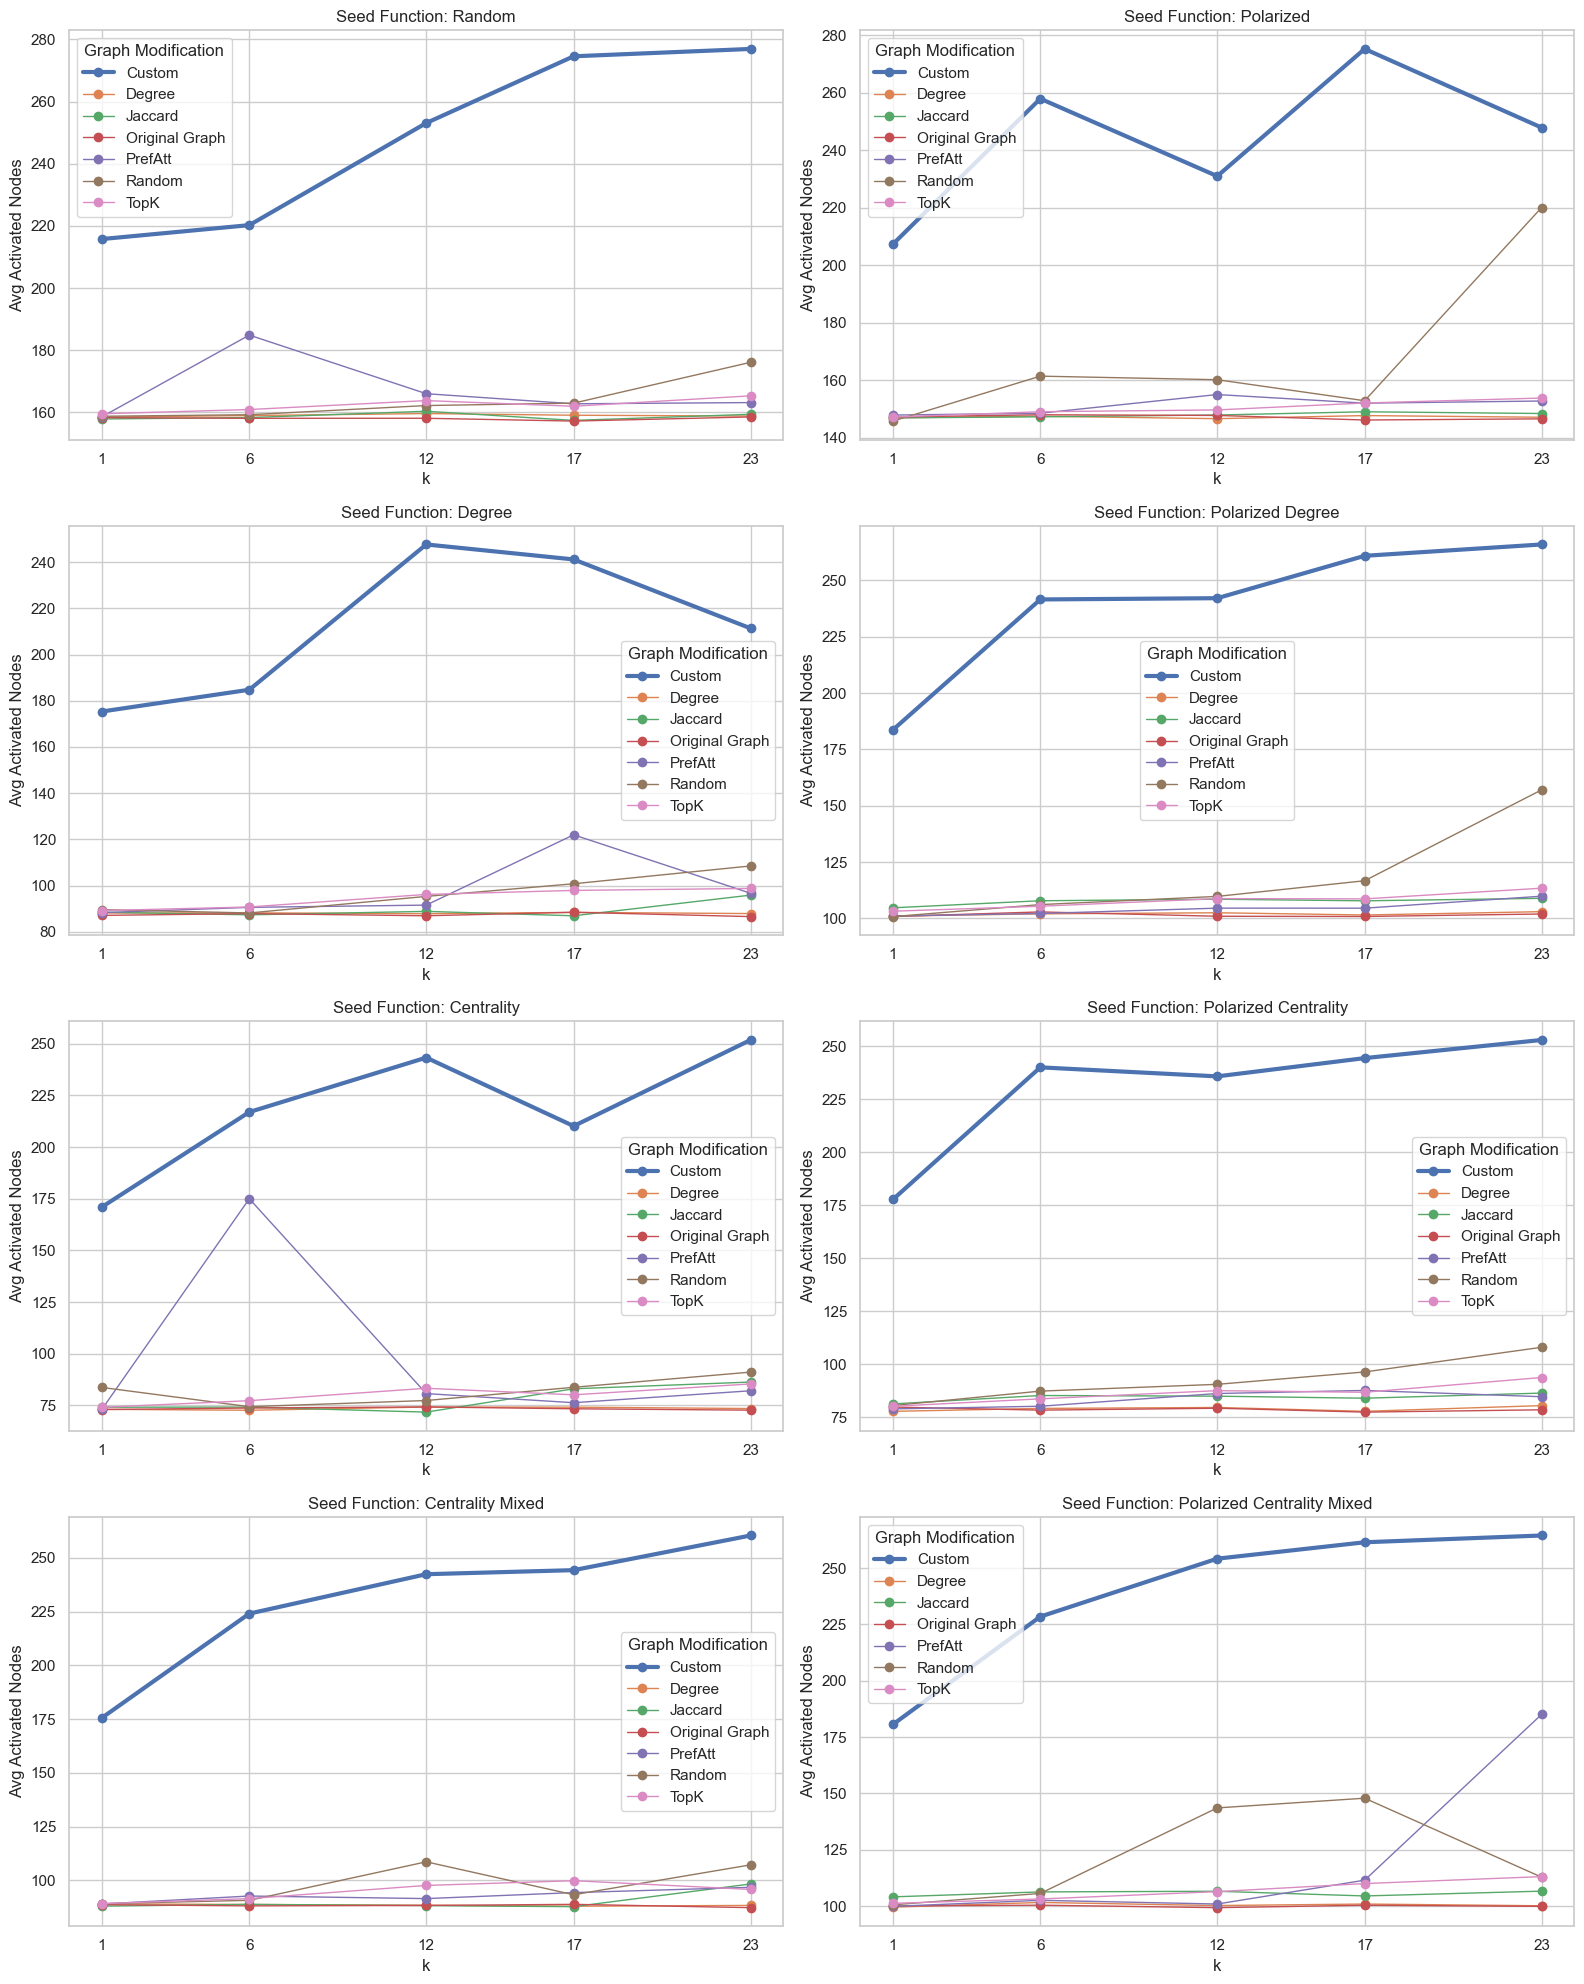

In [16]:
# Dictionary to store k values and corresponding dataframes
k_dict = {}

# Define the desired order of seed functions
SEED_FUNCTION_ORDER = [
    "Random",
    "Polarized",
    "Degree",
    "Polarized Degree",
    "Centrality",
    "Polarized Centrality",
    "Centrality Mixed",
    "Polarized Centrality Mixed"
]

# Iterate over all the files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        try:
            k_value = filename.split("_k_")[0].split("_")[-1]
            k_value = int(k_value)
        except (IndexError, ValueError):
            print(f"Filename {filename} does not match the expected pattern.")
            continue
        
        # Read the CSV file into a DataFrame
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        
        df = df[df["Graph Modification"] != "KKT"]
        
        # Store the DataFrame in the dictionary with k as the key
        k_dict[k_value] = df[["Seed Function", "Graph Modification", "Avg Activated Nodes"]]

# Combine dataframes with k values
dfs = []
for k, df in k_dict.items():
    df['k'] = k
    dfs.append(df)

if not dfs:
    raise ValueError("No dataframes available to concatenate.")

combined_df = pd.concat(dfs, ignore_index=True)

# Apply seaborn style
sns.set(style="whitegrid")

# Set up the grid layout
num_seed_functions = len(SEED_FUNCTION_ORDER)
cols = 2
rows = math.ceil(num_seed_functions / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 5))
axes = axes.flatten()

# Iterate over seed functions in the specified order
for i, seed_function in enumerate(SEED_FUNCTION_ORDER):
    if seed_function in combined_df['Seed Function'].unique():
        # Filter the dataframe for the current seed function
        seed_df = combined_df[combined_df['Seed Function'] == seed_function]
        
        # Create pivot table
        pivot_table = seed_df.pivot_table(index='k', columns='Graph Modification', values='Avg Activated Nodes')
        
        # Reindex the pivot table
        pivot_table = pivot_table.reindex(k_values)

        # Plot with different line widths based on modification type
        ax = axes[i]
        for graph_modification in pivot_table.columns:
            if graph_modification in ["Custom", "Custom V2", "Custom V3"]:
                pivot_table[graph_modification].plot(ax=ax, marker='o', linewidth=3, label=graph_modification)
            else:
                pivot_table[graph_modification].plot(ax=ax, marker='o', linewidth=1, label=graph_modification)

        # Set plot attributes
        ax.set_title(f"Seed Function: {seed_function}")
        ax.set_xlabel("k")
        ax.set_ylabel("Avg Activated Nodes")
        ax.set_xticks(k_values)
        ax.legend(title="Graph Modification")
    else:
        print(f"Warning: Seed function '{seed_function}' not found in the data")

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

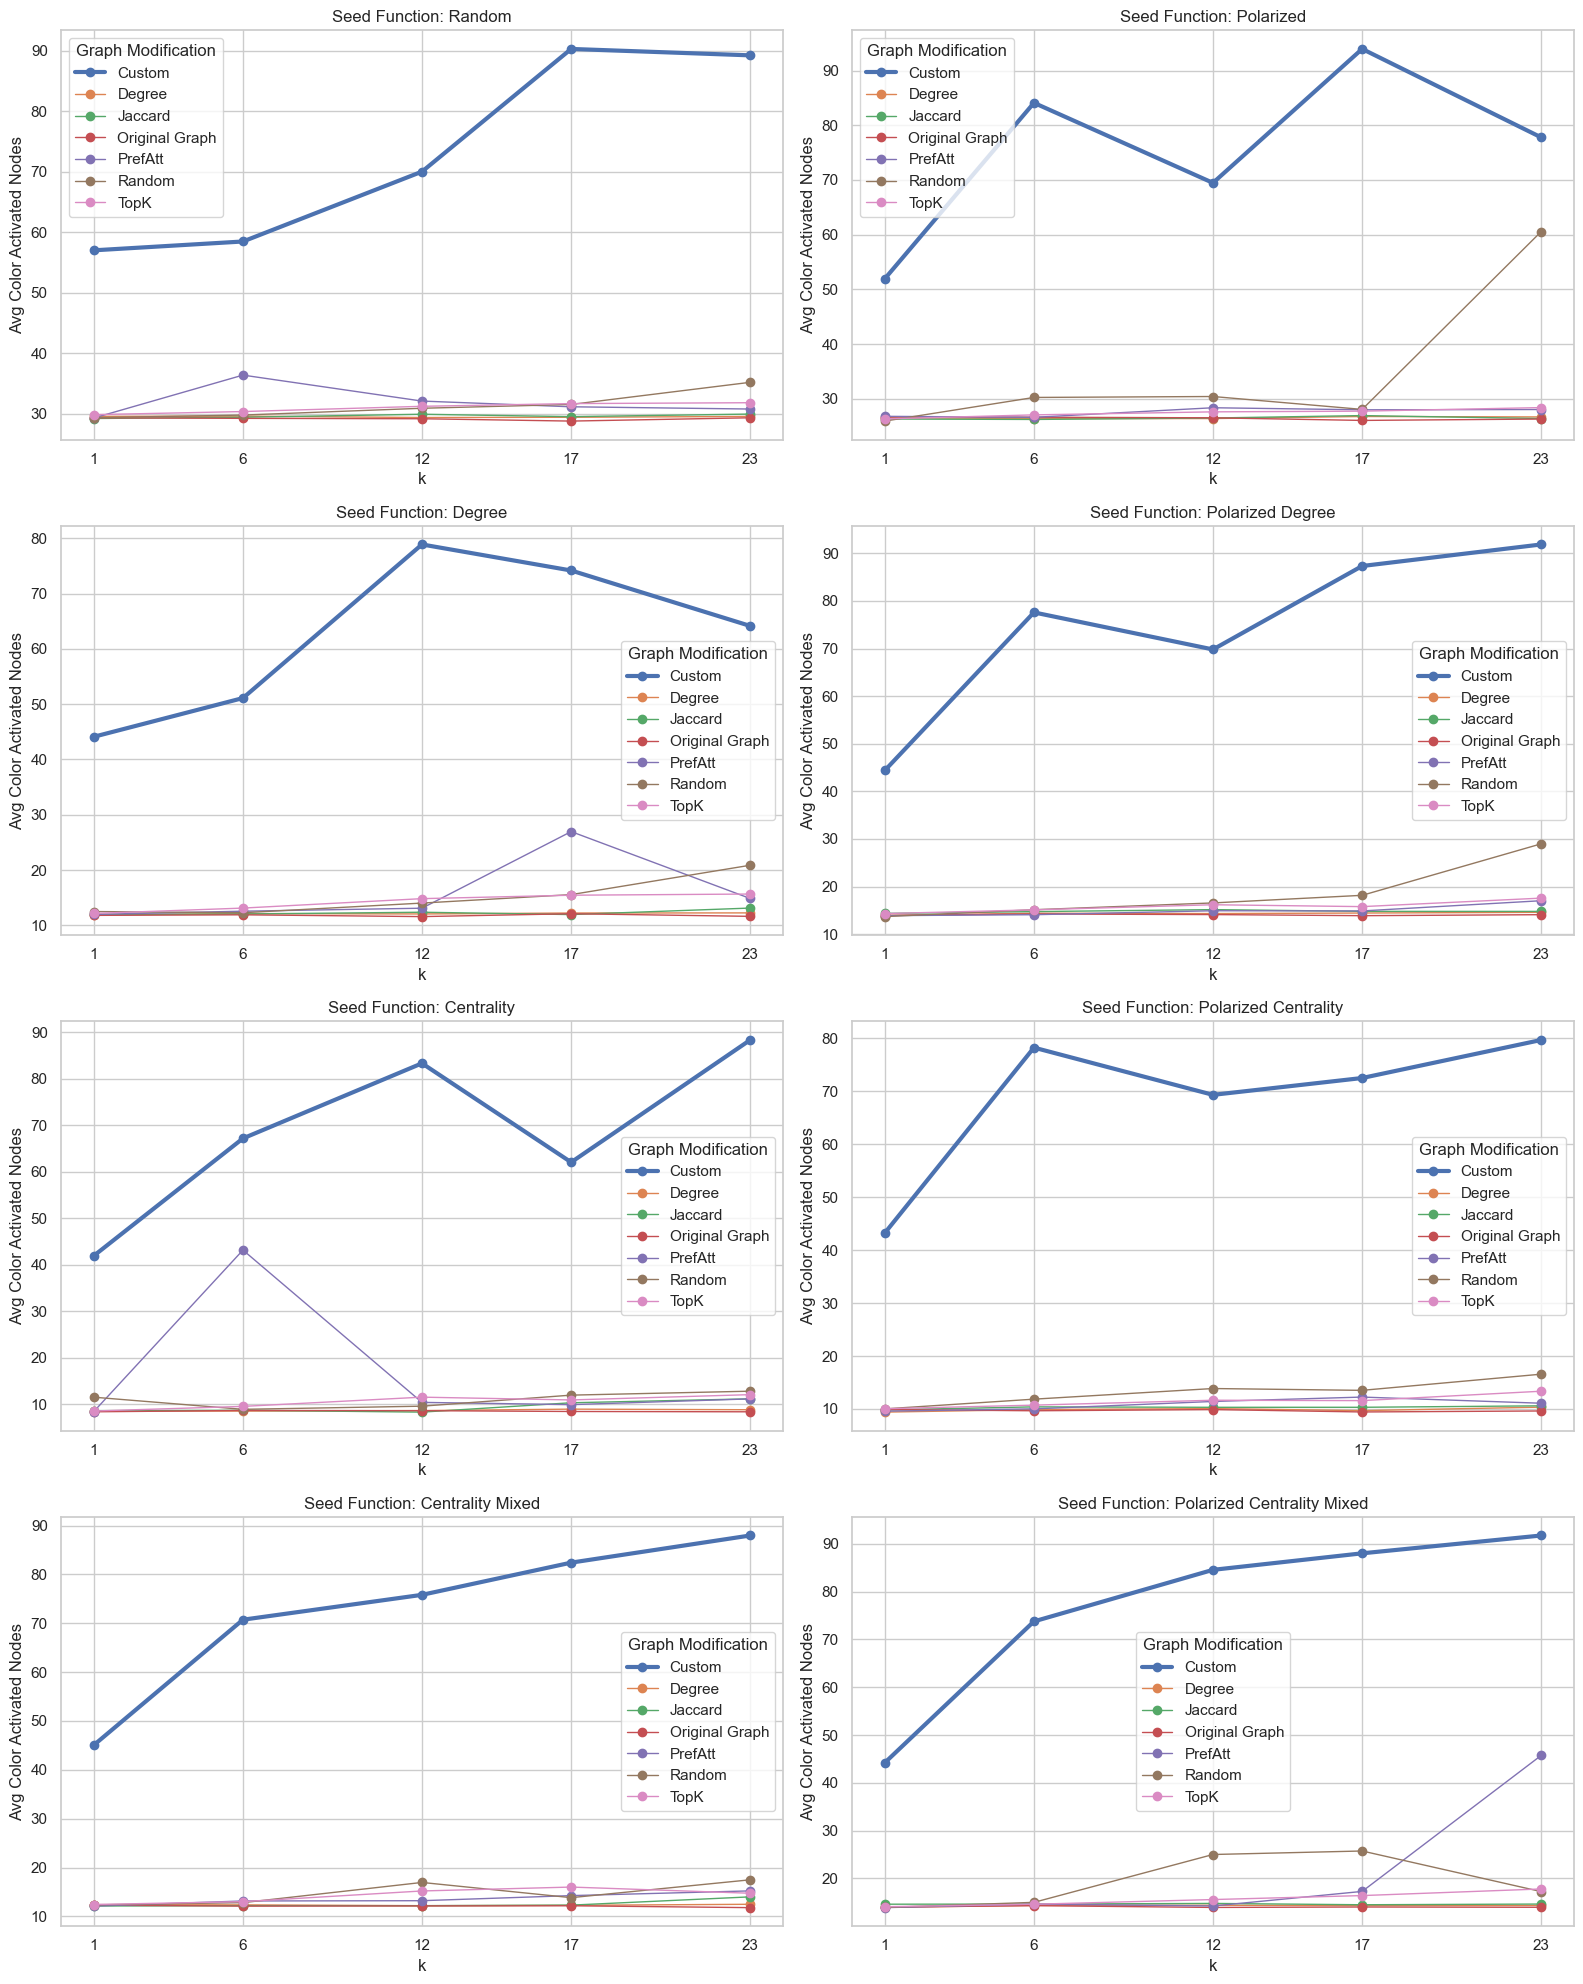

In [18]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Dictionary to store k values and corresponding dataframes
k_dict = {}

# Define the desired order of seed functions
SEED_FUNCTION_ORDER = [
    "Random",
    "Polarized",
    "Degree",
    "Polarized Degree",
    "Centrality",
    "Polarized Centrality",
    "Centrality Mixed",
    "Polarized Centrality Mixed"
]

# Iterate over all the files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        try:
            k_value = filename.split("_k_")[0].split("_")[-1]
            k_value = int(k_value)
        except (IndexError, ValueError):
            print(f"Filename {filename} does not match the expected pattern.")
            continue
        
        # Read the CSV file into a DataFrame
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        
        # Store the DataFrame in the dictionary with k as the key
        k_dict[k_value] = df[["Seed Function", "Graph Modification", "Avg Color Activation Count"]]

# Combine dataframes with k values
dfs = []
for k, df in k_dict.items():
    df['k'] = k
    dfs.append(df)

if not dfs:
    raise ValueError("No dataframes available to concatenate.")

combined_df = pd.concat(dfs, ignore_index=True)

# Apply seaborn style
sns.set(style="whitegrid")

# Set up the grid layout
num_seed_functions = len(SEED_FUNCTION_ORDER)
cols = 2
rows = math.ceil(num_seed_functions / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 5))
axes = axes.flatten()

# Iterate over seed functions in the specified order
for i, seed_function in enumerate(SEED_FUNCTION_ORDER):
    if seed_function in combined_df['Seed Function'].unique():
        # Filter the dataframe for the current seed function
        seed_df = combined_df[combined_df['Seed Function'] == seed_function]
        
        # Create pivot table
        pivot_table = seed_df.pivot_table(index='k', columns='Graph Modification', values='Avg Color Activation Count')
        
        # Reindex the pivot table
        pivot_table = pivot_table.reindex(k_values)

        # Plot with different line widths based on modification type
        ax = axes[i]
        for graph_modification in pivot_table.columns:
            if graph_modification in ["Custom", "Custom V2", "Custom V3"]:
                pivot_table[graph_modification].plot(ax=ax, marker='o', linewidth=3, label=graph_modification)
            else:
                pivot_table[graph_modification].plot(ax=ax, marker='o', linewidth=1, label=graph_modification)

        # Set plot attributes
        ax.set_title(f"Seed Function: {seed_function}")
        ax.set_xlabel("k")
        ax.set_ylabel("Avg Color Activated Nodes")
        ax.set_xticks(k_values)
        ax.legend(title="Graph Modification")
    else:
        print(f"Warning: Seed function '{seed_function}' not found in the data")

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()